In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import scipy

import os
%matplotlib inline

In [3]:
plt.style.use('default')
plt.rc('font', family='Helvetica')
plt.rcParams['pdf.fonttype'] = 42

## Function

In [28]:
def heatmapPlot(data,
                cmap=None,
                threashold=None,
                fmt = 'd',
                minimum=0,
                figsize=(9.5,7.8),
                mask=None,
                pvalue=None,
                title='',
                save=False):
    """
    """
    plt.style.use('default')
    plt.rc('font', family='Helvetica')
    plt.rcParams['pdf.fonttype'] = 42
    plt.figure(figsize=figsize)
    sns.set_theme(style='white')
    
    plt.figure(figsize=figsize)
    
    tmp = data.copy()
    if threashold is not None:
        tmp[tmp>=threashold] = threashold
    
    if cmap is None:
        cmap = sns.cubehelix_palette(light=1, as_cmap=True, rot=.3, dark=0.3)

    mask = np.triu(np.ones_like(data,dtype=bool),k=1)
    sns.set_theme(font_scale=2.2, font='Helvetica',style='white')
    ax = sns.heatmap(tmp,
                     xticklabels=1,
                     yticklabels=1,
                     cmap=cmap,
                     mask=mask,
                     cbar_kws={"shrink": 1})
    plt.xticks(rotation=60, fontsize=25, ha='right') 
    plt.yticks(rotation=0, fontsize=25)
    plt.title(title, fontsize=30, pad=8)

    thresh = tmp.max().max() / 1.5
    
    import itertools
    fontsize=20
    for i, j in itertools.product(range(data.shape[0]), range(data.shape[1])):
        if j<=i:
            if data.iloc[i, j] >= minimum:
                plt.text(j+0.5, i+0.7, format(data.iloc[i, j], fmt),
                     ha='center', 
                     va='bottom',
                     fontsize=fontsize,
                     color="white" if data.iloc[i, j] > thresh else "black")
                
    if pvalue is not None:
        for i, j in itertools.product(range(tmp.shape[0]), range(tmp.shape[1])):
            if j<=i:
                if tmp.iloc[i, j] >= minimum:
                    if (pvalue.iloc[i, j] < 0.05)&(pvalue.iloc[i, j]>=0.01):
                        plt.text(j+0.5, i+1.1, '*',
                             ha='center', 
                             va='bottom',
                             fontsize=fontsize,
                             color="white" if tmp.iloc[i, j] > thresh else "black")
                    elif (pvalue.iloc[i, j] < 0.01)&(pvalue.iloc[i, j]>=0.001):
                        plt.text(j+0.5, i+1.1, '**',
                             ha='center', 
                             va='bottom',
                             fontsize=fontsize,
                             color="white" if tmp.iloc[i, j] > thresh else "black")
                    elif (pvalue.iloc[i, j] < 0.001):
                        plt.text(j+0.5, i+1.1, '***',
                             ha='center', 
                             va='bottom',
                             fontsize=fontsize,
                             color="white" if tmp.iloc[i, j] > thresh else "black")
    if save:
        plt.savefig(save,dpi=100,format='pdf',bbox_inches='tight')  

def continue_color(start, end, n_colors=10, show=True):
    import colormath
    import numpy as np
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from colormath.color_objects import sRGBColor, HSVColor, LabColor, LCHuvColor, XYZColor, LCHabColor
    from colormath.color_conversions import convert_color

    def hex_to_rgb_color(hex):
        return sRGBColor(*[int(hex[i + 1:i + 3], 16) for i in (0, 2 ,4)], is_upscaled=True)

    def plot_color_palette(colors, subplot, title, plt_count):
        ax = fig.add_subplot(plt_count, 1, subplot)
        for sp in ax.spines: ax.spines[sp].set_visible(False)
        for x, color in enumerate(colors):
            ax.add_patch(mpl.patches.Rectangle((x, 0), 0.95, 1, facecolor=color))
        ax.set_xlim((0, len(colors)))
        ax.set_ylim((0, 1))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect("equal")
        plt.title(title)

    def create_palette(start_rgb, end_rgb, n, colorspace):
        # convert start and end to a point in the given colorspace
        start = convert_color(start_rgb, colorspace).get_value_tuple()
        end = convert_color(end_rgb, colorspace).get_value_tuple()

        # create a set of n points along start to end
        points = list(zip(*[np.linspace(start[i], end[i], n) for i in range(3)]))

        # create a color for each point and convert back to rgb
        rgb_colors = [convert_color(colorspace(*point), sRGBColor) for point in points]

        # finally convert rgb colors back to hex
        return [color.get_rgb_hex() for color in rgb_colors]

    start_color = start
    end_color = end
    number_of_colors = n_colors
    colorspaces = (sRGBColor, HSVColor)#, LabColor, LCHuvColor, LCHabColor, XYZColor)

    start_rgb = hex_to_rgb_color(start_color)
    end_rgb = hex_to_rgb_color(end_color)
    fig = plt.figure(figsize=(number_of_colors, len(colorspaces)), frameon=False)

    # for index, colorspace in enumerate(colorspaces):
    palette = create_palette(start_rgb, end_rgb, number_of_colors, colorspace=sRGBColor)
    if show:
        plot_color_palette(palette, index + 1, colorspace.__name__, len(colorspaces))

        plt.subplots_adjust(hspace=1.5)
        plt.show()
    
    return palette
        
def heatmapPlot2(data,
                ibool,
                ibool_threashold,
                pvalue,
                vmax=None,
                vmin=None,
                cmap=None,
                mask=None,
                fmt = 'd',
                figsize=(9.5,7.8),
                title='',
                save=False):
    """
    """
   
    plt.style.use('default')
    plt.rc('font', family='Helvetica')
    plt.rcParams['pdf.fonttype'] = 42
    plt.figure(figsize=figsize)
    sns.set_theme(style='white')
  
    tmp = data.copy()
    if vmax is not None:
        tmp[tmp>vmax] = vmax
    if vmin is not None:
        tmp[tmp<vmin] = vmin
    tmp = tmp*(ibool>ibool_threashold)
    
    if cmap is None:
        cmap = sns.cubehelix_palette(light=1, as_cmap=True, rot=.3, dark=0.3)

    sns.set_theme(font_scale=2.2, font='Helvetica',style='white')
    
    mask = np.triu(np.ones_like(data,dtype=bool),k=1)
    ax = sns.heatmap(tmp,
                     xticklabels=1,
                     yticklabels=1,
                     cmap=cmap,
                     mask=mask,
                     vmax=vmax,
                     vmin=vmin,
                     # square=True,
                     cbar_kws={"shrink": 1})
    plt.xticks(rotation=60, fontsize=25, ha='right') 
    plt.yticks(rotation=0, fontsize=25)
    plt.title(title, fontsize=25, pad=8)
    thresh = tmp.max().max() / 1.5
    
    import itertools
    fontsize=20
                
    for i, j in itertools.product(range(ibool.shape[0]), range(ibool.shape[1])):
        if j <= i:
            if ibool.iloc[i, j] <= ibool_threashold:
                plt.text(j+0.5, i+0.6, '#',
                     ha='center', 
                     va='bottom',
                     fontsize=fontsize,
                     color="white" if data.iloc[i, j] > thresh else "black")
            elif pvalue.iloc[i, j] < 0.05:            
                    plt.text(j+0.5, i+0.6, format(data.iloc[i, j], fmt),
                             ha='center', 
                             va='bottom',
                             fontsize=fontsize,
                             color="white" if data.iloc[i, j] > thresh else "black")
                    if pvalue.iloc[i, j]>=0.01: 
                        plt.text(j+0.5, i+1.1, '*',
                             ha='center', 
                             va='bottom',
                             fontsize=fontsize,
                             color="white" if tmp.iloc[i, j] > thresh else "black")
                    elif (pvalue.iloc[i, j] < 0.01)&(pvalue.iloc[i, j]>=0.001):
                        plt.text(j+0.5, i+1.1, '**',
                             ha='center', 
                             va='bottom',
                             fontsize=fontsize,
                             color="white" if tmp.iloc[i, j] > thresh else "black")
                    elif (pvalue.iloc[i, j] < 0.001):
                        plt.text(j+0.5, i+1.1, '***',
                             ha='center', 
                             va='bottom',
                             fontsize=fontsize,
                             color="white" if tmp.iloc[i, j] > thresh else "black")
                
    if save:
        plt.savefig(save,dpi=100,format='pdf',bbox_inches='tight')  

In [12]:
def InteractionStrength(clumps, cts, method='intensity', weight=False):
    """
    """
    from scipy.special import perm, comb
    out = []
    for clump in clumps:
        df_tmp = pd.DataFrame(index=cts, columns=cts)
        df_tmp = df_tmp.fillna(0)
        tmp = pd.Series(clump).value_counts()
        c = tmp.index
        if method == 'intensity':
            for c1 in c:
                for c2 in c:
                    if c1 == c2:
                        df_tmp.loc[c1,c2]=comb(tmp[c1],2)/comb(tmp.sum(),2)
                    else:
                        df_tmp.loc[c1,c2]=(tmp[c1]*tmp[c2])/comb(tmp.sum(),2)
            if weight==True:
                out.append(df_tmp*tmp.sum())
            else:
                out.append(df_tmp)
        elif method == 'comb':
            for c1 in c:
                for c2 in c:
                    if c1 == c2:
                        df_tmp.loc[c1,c2]=comb(tmp[c1],2)
                    else:
                        df_tmp.loc[c1,c2]=tmp[c1]*tmp[c2]
            out.append(df_tmp)
        elif method == 'count':
            for i in range(len(clump)):
                for j in range(len(clump)):
                    if i!=j:
                        df_tmp.loc[clump[i],clump[j]]=1
            out.append(df_tmp)
    out = pd.DataFrame(np.sum(out, axis=0), index=cts, columns=cts)
    return out
    
def permutation_test(df, key='celltype', outdir='./'):
    import random

    tmp = df.loc[df['CellID'].isin(df['CellID'].value_counts()[df['CellID'].value_counts()>1].index)]
    cellcounts = tmp[key].value_counts()
    
    clumps_all = df.groupby('CellID')[key].apply(lambda x:list(x))
    clumps = []
    for clump in clumps_all:
        if len(clump) > 1:
            clumps.append(clump)
    clumps_merge = np.concatenate(clumps)     
    a = 0
    split_idx = [a]
    for i in range(len(clumps)):
        a = a + len(clumps[i])
        split_idx.append(a)
    
    obs_permutation_all = []
    n_permutation = 1000
    for n in range(n_permutation):
        if n%100==0:
            print(n)
        clumps_tmp = random.sample(list(clumps_merge),len(clumps_merge))
        clumps_permutation = []
        for i in range(len(split_idx)-1):
            clumps_permutation.append(list(clumps_tmp[split_idx[i]:split_idx[i+1]]))
        out = InteractionStrength(clumps_permutation, cts)
        
        for _1 in out.index:
            for _2 in out.columns:
                out.loc[_1,_2] = 100*out.loc[_1,_2]/(cellcounts[_1]*cellcounts[_2])**0.5
        
        obs_permutation_all.append(out)
    
    obs = InteractionStrength(clumps, cts)
    for _1 in obs.index:
        for _2 in obs.columns:
            obs.loc[_1,_2] = 100*obs.loc[_1,_2]/(cellcounts[_1]*cellcounts[_2])**0.5
    
    p = []
    for obs_permutation in obs_permutation_all:
        tmp = (obs < obs_permutation).astype(int)
        p.append(tmp)
    
    p = pd.DataFrame(np.sum(p, axis=0)/n_permutation, index=cts, columns=cts)
    e = pd.DataFrame(obs.values/(np.mean(obs_permutation_all, axis=0)+1e-8), index=cts, columns=cts)
    
    obs.to_csv(outdir + '/intensity.txt', sep='\t')
    obs_permutation = pd.DataFrame(np.mean(obs_permutation_all, axis=0), index=cts, columns=cts)
    obs_permutation.to_csv(outdir + '/intensity_permutation.txt', sep='\t')
    p.to_csv(outdir + '/p.txt', sep='\t')
    e.to_csv(outdir + '/e.txt', sep='\t')

## interaction

In [5]:
adata = sc.read_h5ad('/home/tiankang/tanglei/submit/processed/Fig.3-4/adata.h5ad')
df = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/result.txt', sep='\t', index_col=0)
df = df.loc[df['qc']==1]

cts = ['Enterocyte_villus_tip',
       'Enterocyte_villus_middle', 
       'Enterocyte_villus_bottom', 
       'Goblet_villus',
       'Goblet_crypt',
       'TA',
       'Stem cell',
       'Paneth',
       'EEC',
       'Tuft',]

In [13]:
df_ko = df.loc[(df.condition=='APC-ko')&(df.celltype_axis.isin(cts)),:]
clumps_all = df_ko.groupby('CellID')['celltype_axis'].apply(lambda x:list(x))
clumps = []
for clump in clumps_all:
    if len(clump) > 1:
        clumps.append(clump)

is1 = InteractionStrength(clumps, cts, method='intensity', weight=False)
is2_ko = InteractionStrength(clumps, cts, method='count', weight=False)

tmp = df_ko.loc[df_ko['CellID'].isin(df_ko['CellID'].value_counts()[df_ko['CellID'].value_counts()>1].index)]
cellcounts = tmp['celltype_axis'].value_counts()
obs_ko = is1.copy()
for i in obs_ko.index:
    for j in obs_ko.columns:
        obs_ko.loc[i,j] = 100*obs_ko.loc[i,j]/(cellcounts[i]*cellcounts[j])**0.5

df_wt = df.loc[(df.condition=='WT')&(df.celltype_axis.isin(cts)),:]
clumps_all = df_wt.groupby('CellID')['celltype_axis'].apply(lambda x:list(x))
clumps = []
for clump in clumps_all:
    if len(clump) > 1:
        clumps.append(clump)

is1 = InteractionStrength(clumps, cts, method='intensity', weight=False)
is2_wt = InteractionStrength(clumps, cts, method='count', weight=False)

tmp = df_wt.loc[df_wt['CellID'].isin(df_wt['CellID'].value_counts()[df_wt['CellID'].value_counts()>1].index)]
cellcounts = tmp['celltype_axis'].value_counts()
obs_wt = is1.copy()
for i in obs_wt.index:
    for j in obs_wt.columns:
        obs_wt.loc[i,j] = 100*obs_wt.loc[i,j]/(cellcounts[i]*cellcounts[j])**0.5

<Figure size 10000x200 with 0 Axes>

<Figure size 1280x1000 with 0 Axes>

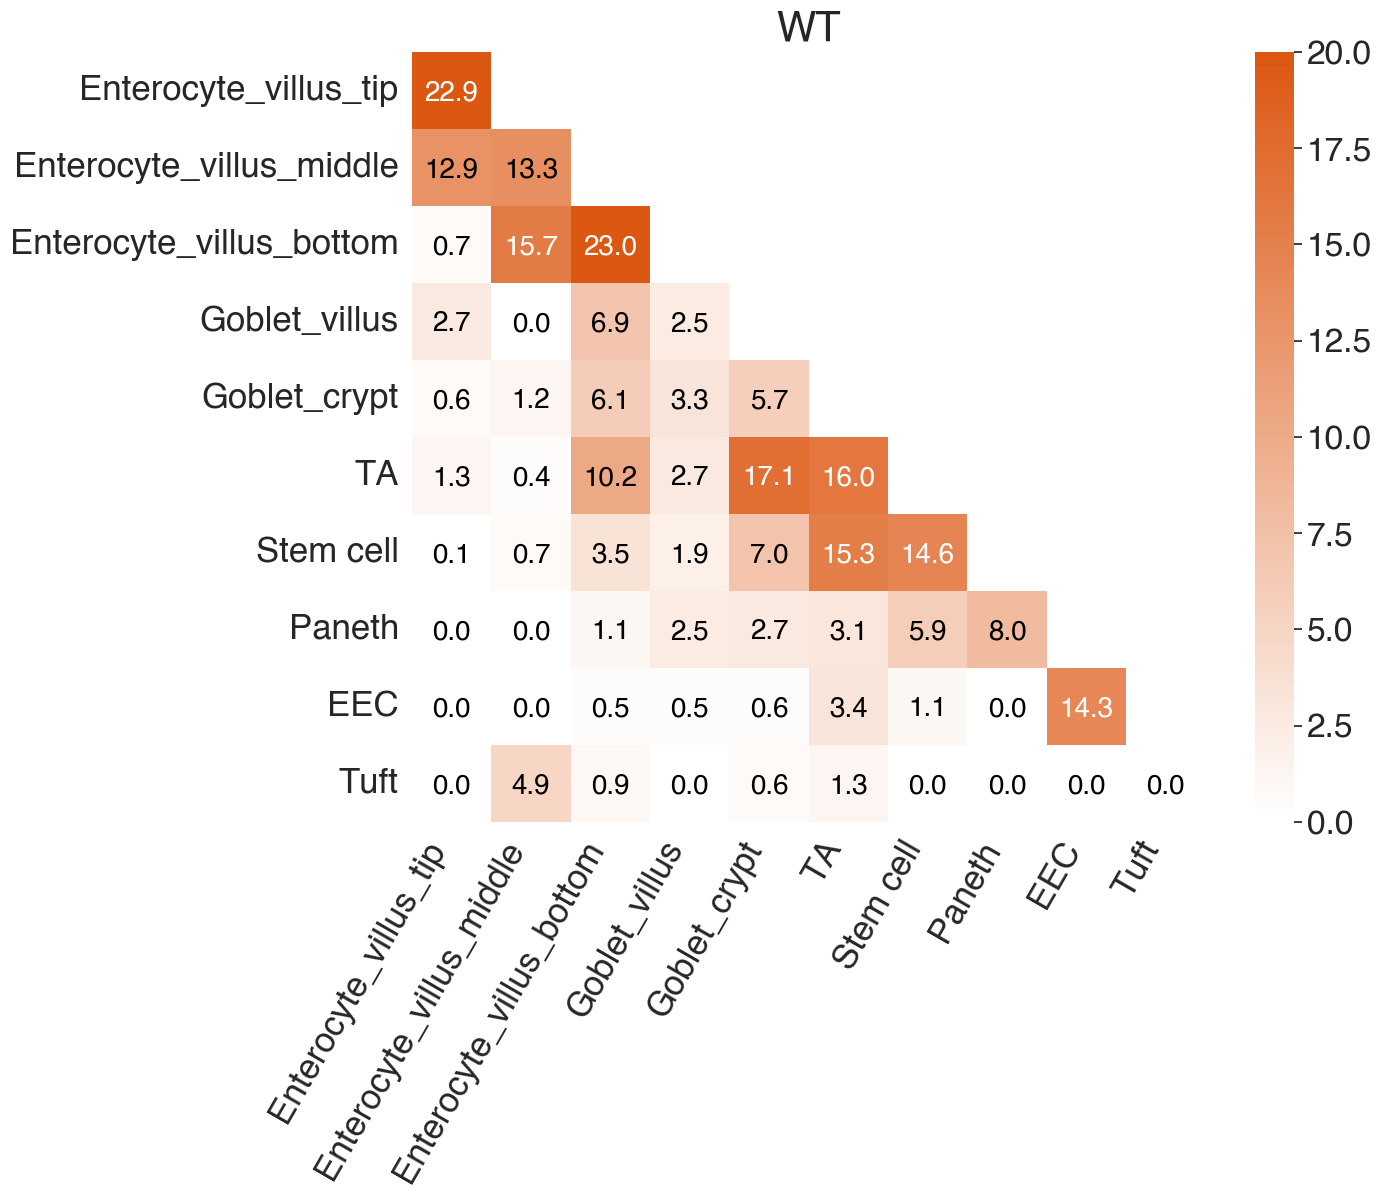

In [12]:
cmap = continue_color("#ffffff", "#dc5712", n_colors=100, show=False)
heatmapPlot(obs_wt, 
            figsize=(12.8,10),
            fmt='.1f', 
            minimum=0,
            # pvalue=obs, 
            threashold=20, 
            title='WT',
            cmap=cmap)

<Figure size 10000x200 with 0 Axes>

<Figure size 1280x1000 with 0 Axes>

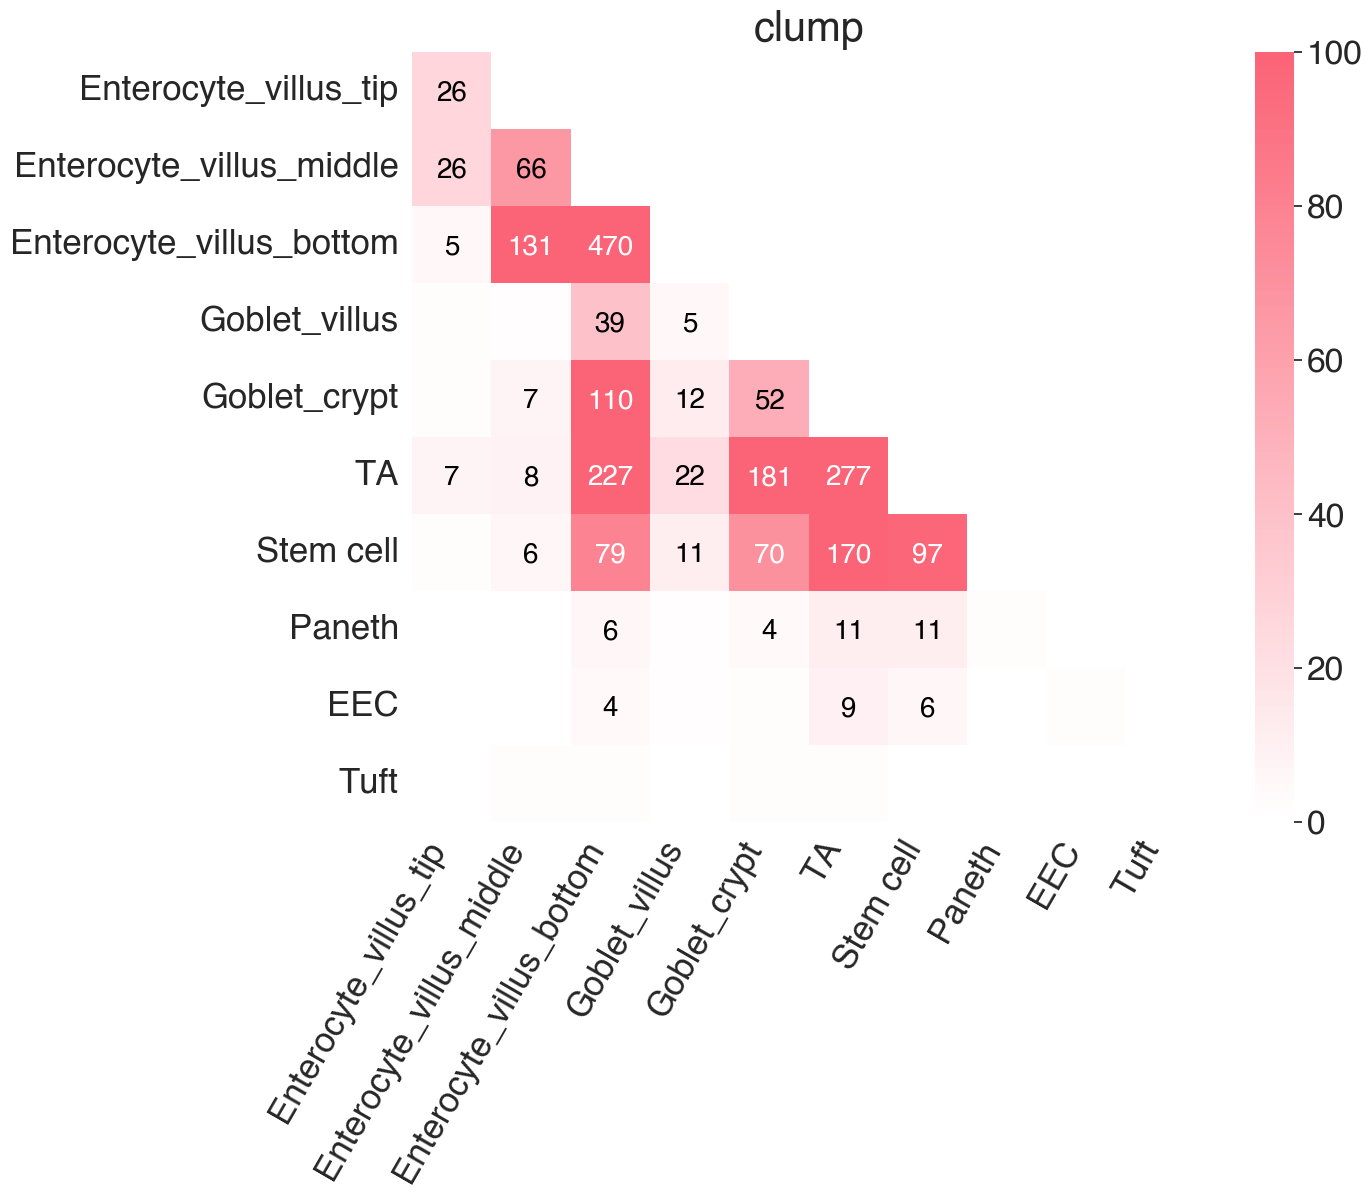

In [14]:
cmap = continue_color("#ffffff", "#FB6376", n_colors=100, show=False)

obs = is2_wt.copy().astype(int)
heatmapPlot(obs, 
            figsize=(12.8,10),
            fmt='d', 
            cmap=cmap,
            minimum=3,
            pvalue=obs, 
            threashold=100, 
            title='clump',
            save=False)

<Figure size 10000x200 with 0 Axes>

<Figure size 1280x1000 with 0 Axes>

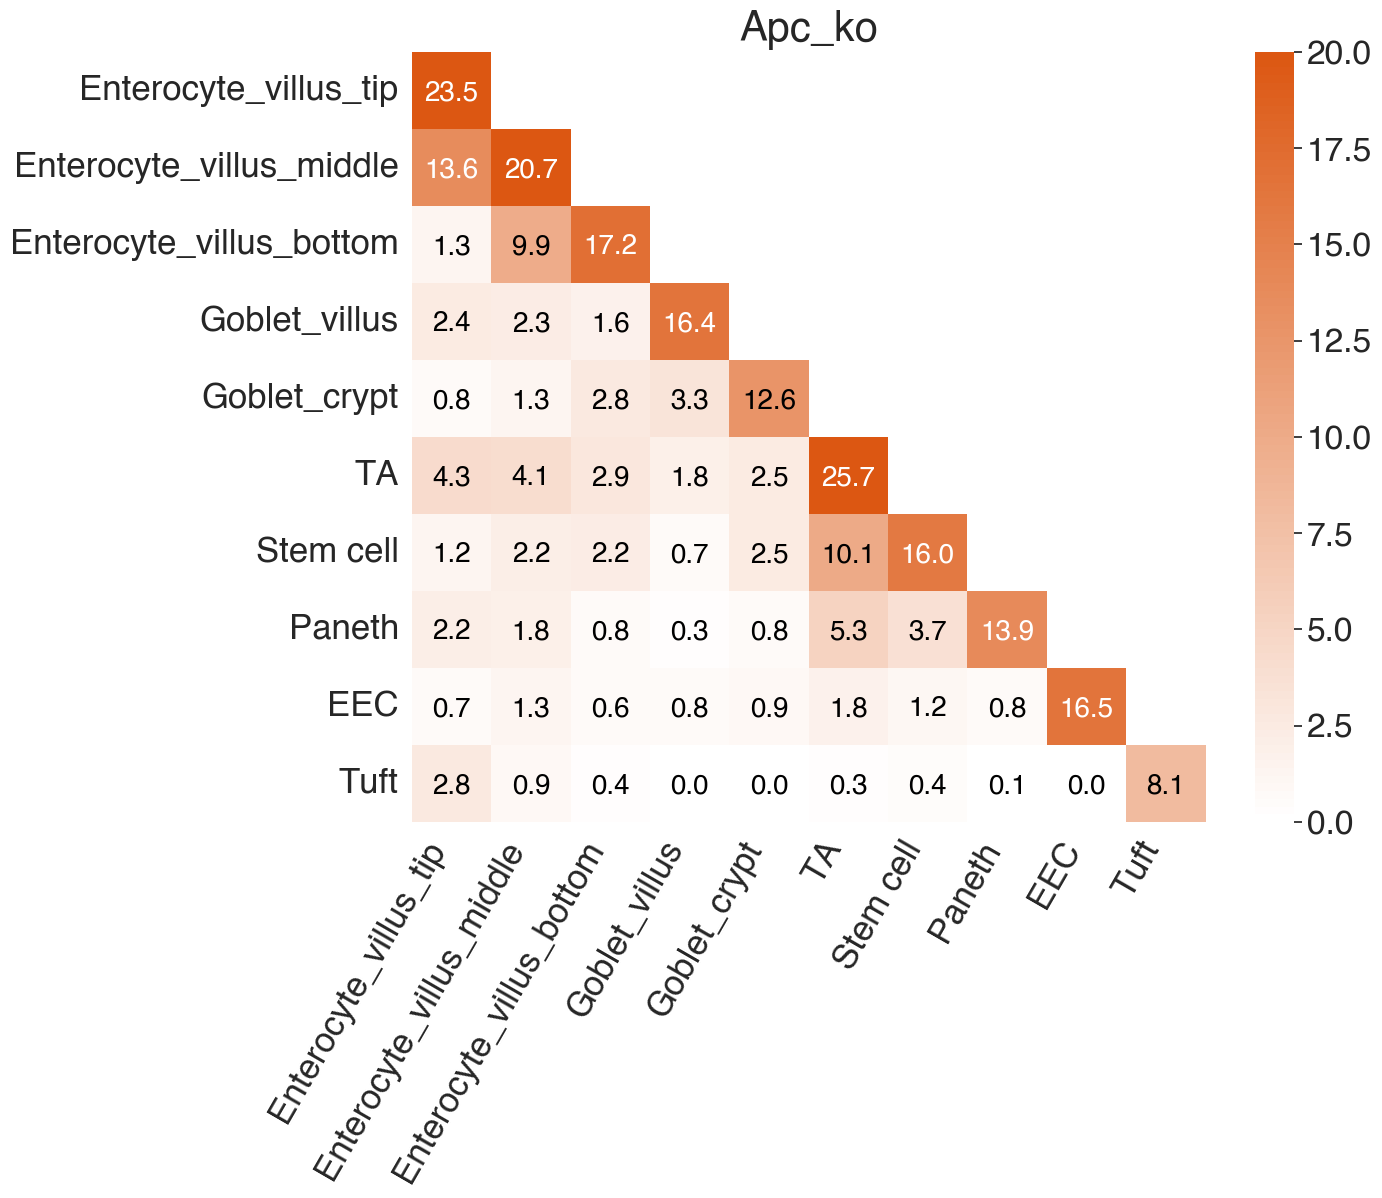

In [11]:
cmap = continue_color("#ffffff", "#dc5712", n_colors=100, show=False)
heatmapPlot(obs_ko, 
            figsize=(12.8,10),
            fmt='.1f', 
            minimum=0,
            # pvalue=obs, 
            threashold=20, 
            title='Apc_ko',
            cmap=cmap)

<Figure size 10000x200 with 0 Axes>

<Figure size 1280x1000 with 0 Axes>

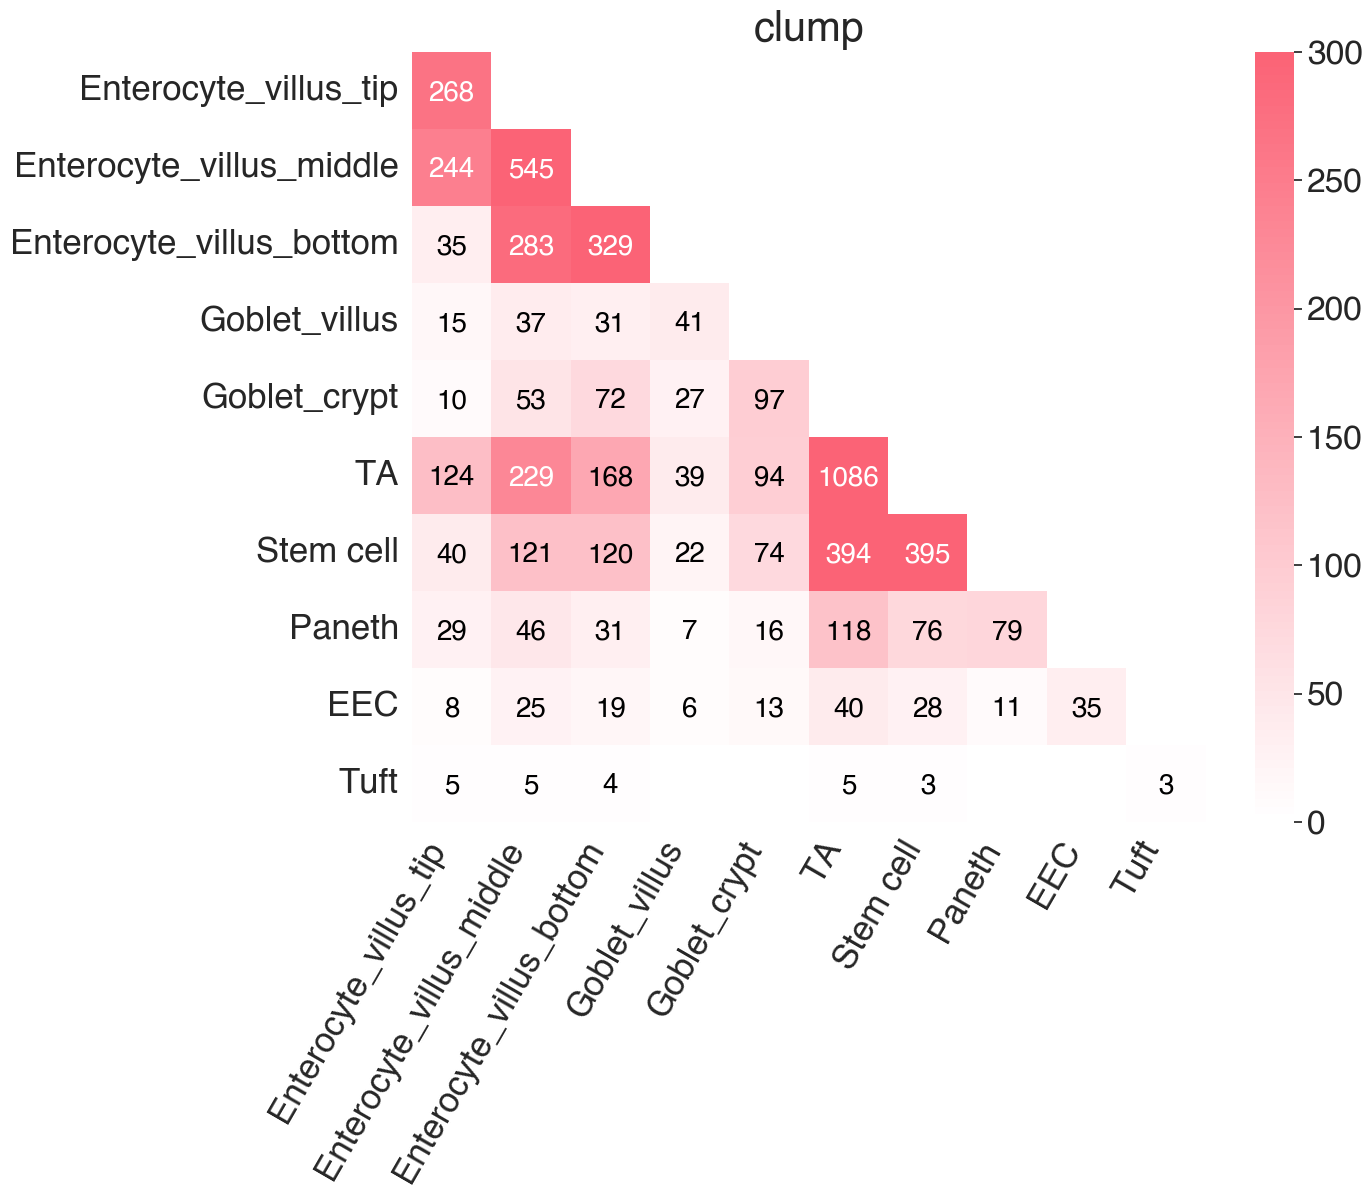

In [16]:
cmap = continue_color("#ffffff", "#FB6376", n_colors=100, show=False)

obs = is2_ko.copy().astype(int)
heatmapPlot(obs, 
            figsize=(12.8,10),
            fmt='d', 
            cmap=cmap,
            minimum=3,
            pvalue=obs, 
            threashold=300, 
            title='clump',
            save=False)

## permutation test

In [ ]:
adata = sc.read_h5ad('/home/tiankang/tanglei/submit/processed/Fig.3-4/adata.h5ad')
df = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/result.txt', sep='\t', index_col=0)
df = df.loc[df['qc']==1]

cts = ['Enterocyte_villus_tip',
       'Enterocyte_villus_middle', 
       'Enterocyte_villus_bottom', 
       'Goblet_villus',
       'Goblet_crypt',
       'TA',
       'Stem cell',
       'Paneth',
       'EEC',
       'Tuft',]

### WT

In [ ]:
permutation_test(df.loc[df['condition']=='WT'], key='celltype_axis', outdir='./interaction/WT/')

In [13]:
df_wt = df.loc[(df.condition=='WT')&(df.celltype_axis.isin(cts)),:]
clumps_all = df_wt.groupby('CellID')['celltype_axis'].apply(lambda x:list(x))

clumps = []
for clump in clumps_all:
    if len(clump) > 1:
        clumps.append(clump)
        
ibool = InteractionStrength(clumps, cts, method='count', weight=False)

In [19]:
x = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/interaction/WT/intensity.txt', sep='\t', index_col=0)
y = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/interaction/WT/intensity_permutation.txt', sep='\t', index_col=0)
p = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/interaction/WT/p.txt', sep='\t', index_col=0)  

e = x/(y+1e-8)

p_enrich = p.copy()
p_depletion = 1 - p_enrich
p = p_enrich*(e>=1).fillna(0) + p_depletion*(e<1).fillna(0)

e = np.log2(e)
e.replace([np.inf, -np.inf], 0, inplace=True)

/home/tiankang/software/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


<Figure size 10000x200 with 0 Axes>

<Figure size 20000x200 with 0 Axes>

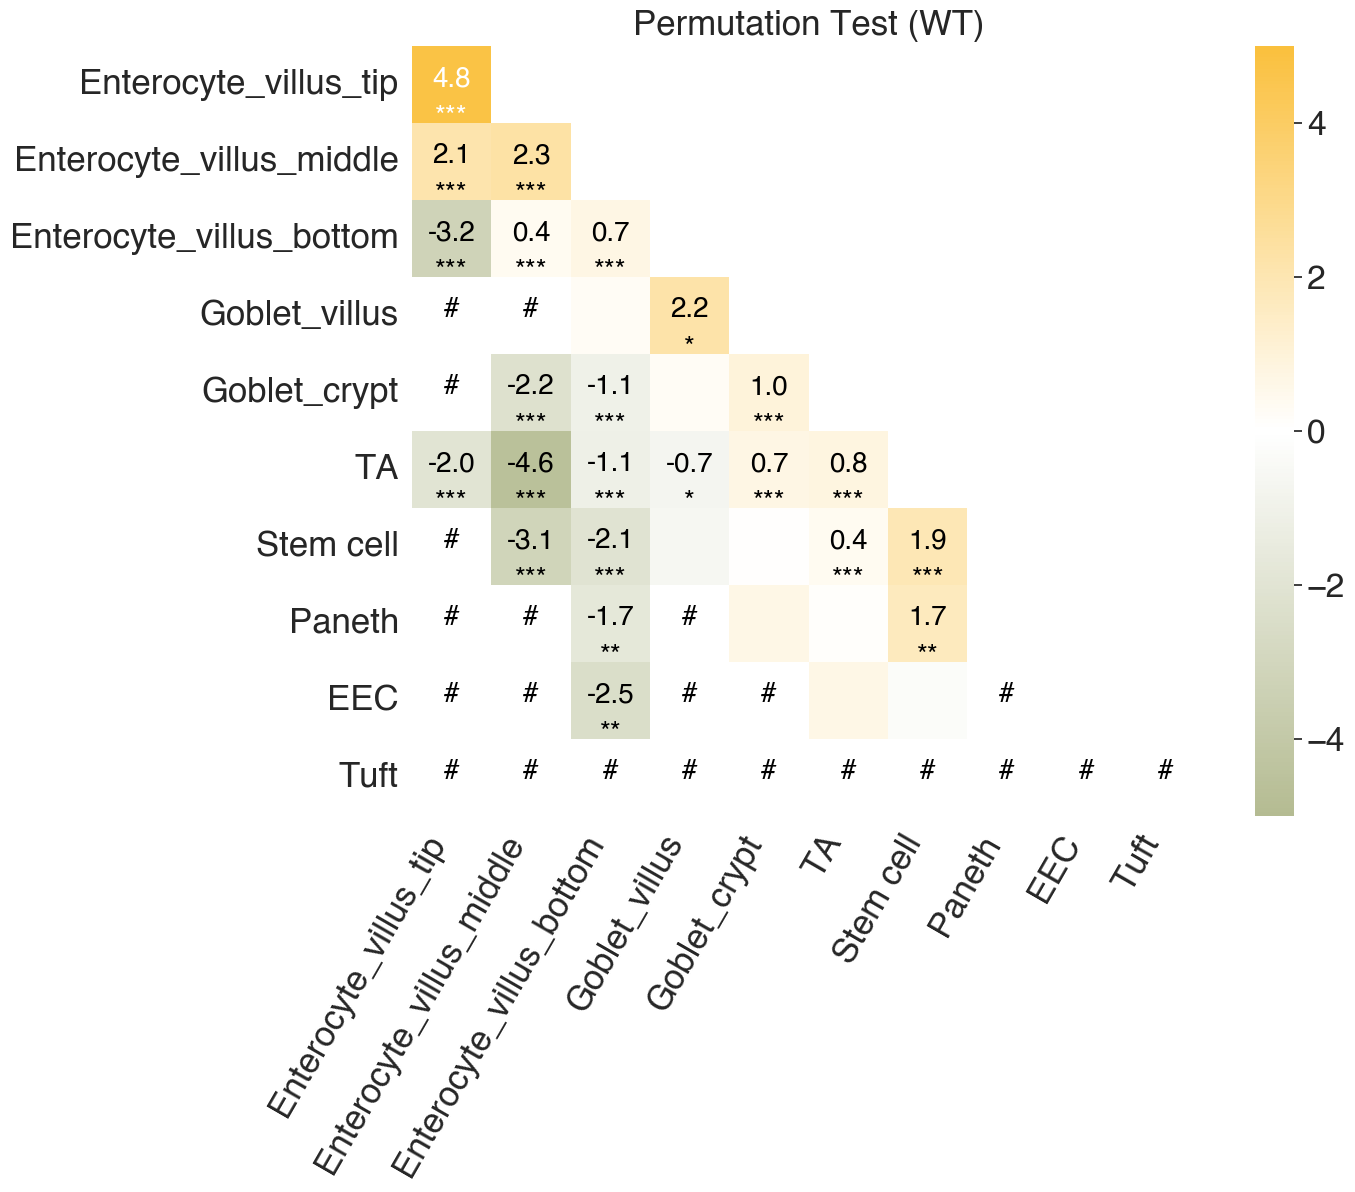

In [20]:
cmap2 = continue_color( "#ffffff",'#fac03d', n_colors=100, show=False)
cmap1 = continue_color('#697723', "#ffffff", n_colors=200, show=False)
cmap = cmap1[100:]+cmap2
heatmapPlot2(e, 
            ibool=ibool,
            ibool_threashold=2,
            pvalue=p,
            vmax=5, 
            vmin=-5, 
            figsize=(12.8,10),
            fmt='.1f', 
            title='Permutation Test (WT)',
            cmap=cmap)

### Apc_KO

In [ ]:
permutation_test(df.loc[df['condition']=='APC-ko'], key='celltype_axis', outdir='./interaction/Apc_KO/')

In [22]:
df_ko = df.loc[(df.condition=='APC-ko')&(df.celltype_axis.isin(cts)),:]
clumps_all = df_ko.groupby('CellID')['celltype_axis'].apply(lambda x:list(x))

clumps = []
for clump in clumps_all:
    if len(clump) > 1:
        clumps.append(clump)
        
ibool = InteractionStrength(clumps, cts, method='count', weight=False)

In [23]:
x = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/interaction/Apc_KO/intensity.txt', sep='\t', index_col=0)
y = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/interaction/Apc_KO/intensity_permutation.txt', sep='\t', index_col=0)
p = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/interaction/Apc_KO/p.txt', sep='\t', index_col=0)  

e = x/(y+1e-8)

p_enrich = p.copy()
p_depletion = 1 - p_enrich
p = p_enrich*(e>=1).fillna(0) + p_depletion*(e<1).fillna(0)

e = np.log2(e)
e.replace([np.inf, -np.inf], 0, inplace=True)

/home/tiankang/software/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


<Figure size 10000x200 with 0 Axes>

<Figure size 20000x200 with 0 Axes>

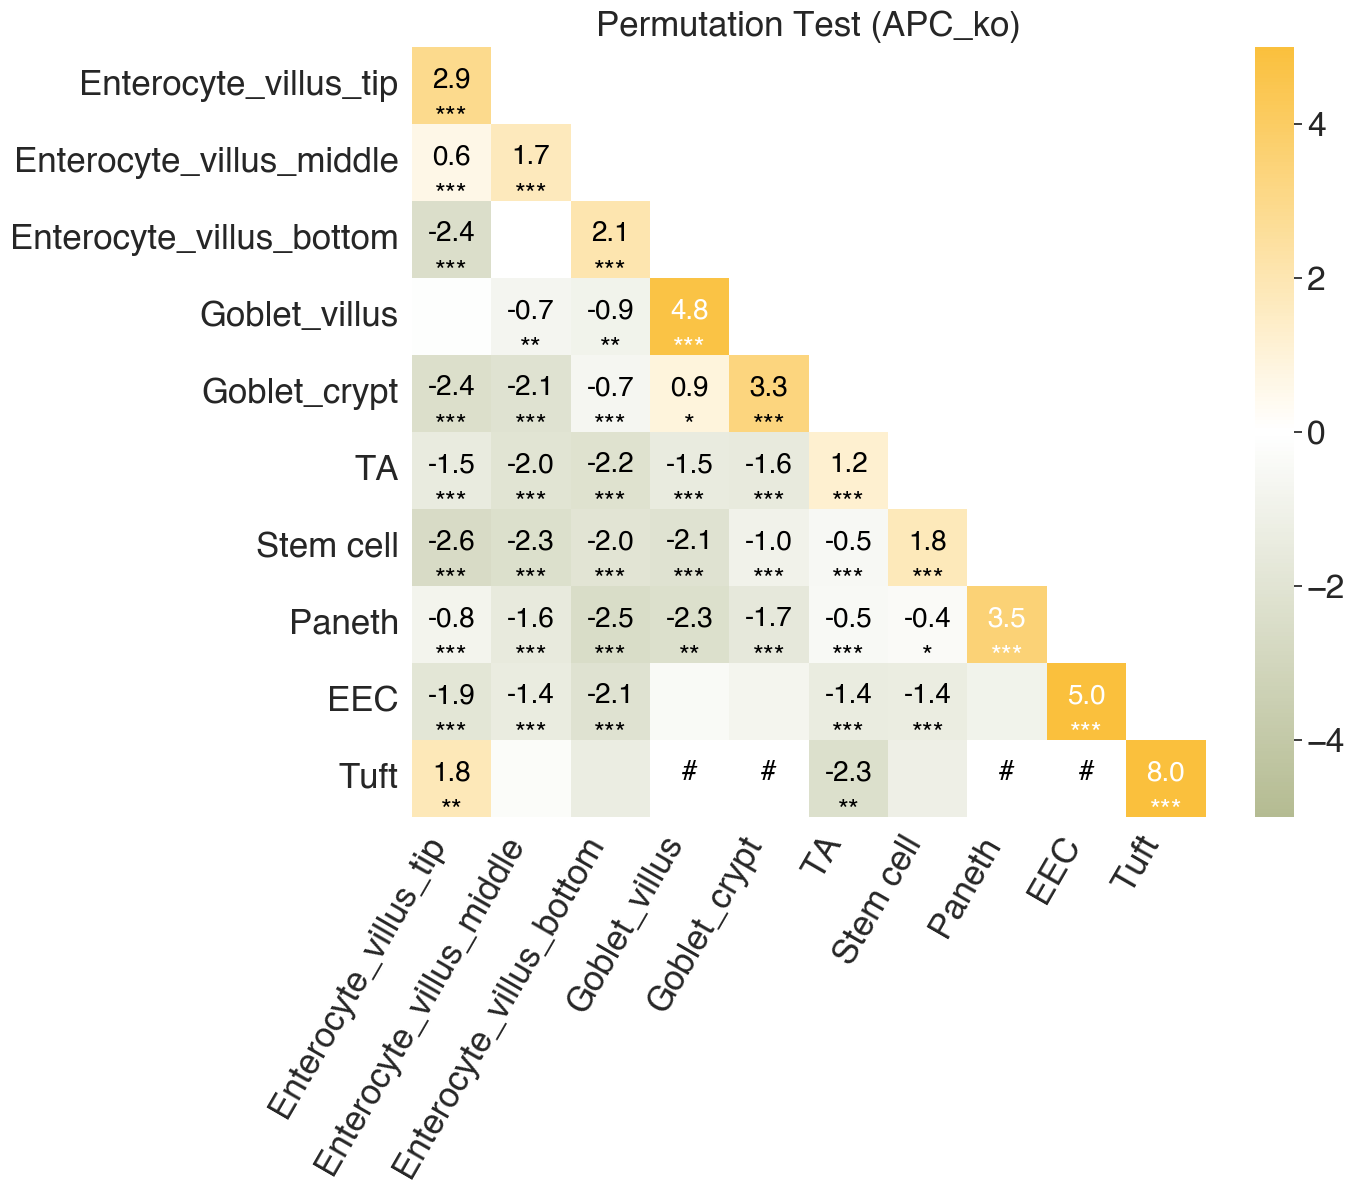

In [25]:
cmap2 = continue_color( "#ffffff",'#fac03d', n_colors=100, show=False)
cmap1 = continue_color('#697723', "#ffffff", n_colors=200, show=False)
cmap = cmap1[100:]+cmap2
heatmapPlot2(e, 
            ibool=ibool,
            ibool_threashold=2,
            pvalue=p,
            vmax=5, 
            vmin=-5, 
            figsize=(12.8,10),
            fmt='.1f', 
            title='Permutation Test (APC_ko)',
            cmap=cmap)

### WT vs Apc_KO

In [ ]:
cts = ['Enterocyte_villus_tip',
       'Enterocyte_villus_middle', 
       'Enterocyte_villus_bottom', 
       'Goblet_villus',
       'Goblet_crypt',
       'TA',
       'Stem cell',
       'Paneth',
       'EEC',
       'Tuft']

df_ko = df.loc[(df.condition=='APC-ko')&(df.celltype_axis.isin(cts)),:]
df_wt = df.loc[(df.condition=='WT')&(df.celltype_axis.isin(cts)),:]

In [ ]:
permutation_test(df_ko, df_wt, key='celltype_axis', outdir='./interaction/WT.vs.KO/')

In [27]:
e = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/interaction/WT.vs.KO/e.txt', sep='\t', index_col=0)
e = np.log2(e)
e.replace([np.inf, -np.inf], 0, inplace=True)
p = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/interaction/WT.vs.KO/p_e.txt', sep='\t', index_col=0)

/home/tiankang/software/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


<Figure size 10000x200 with 0 Axes>

<Figure size 20000x200 with 0 Axes>

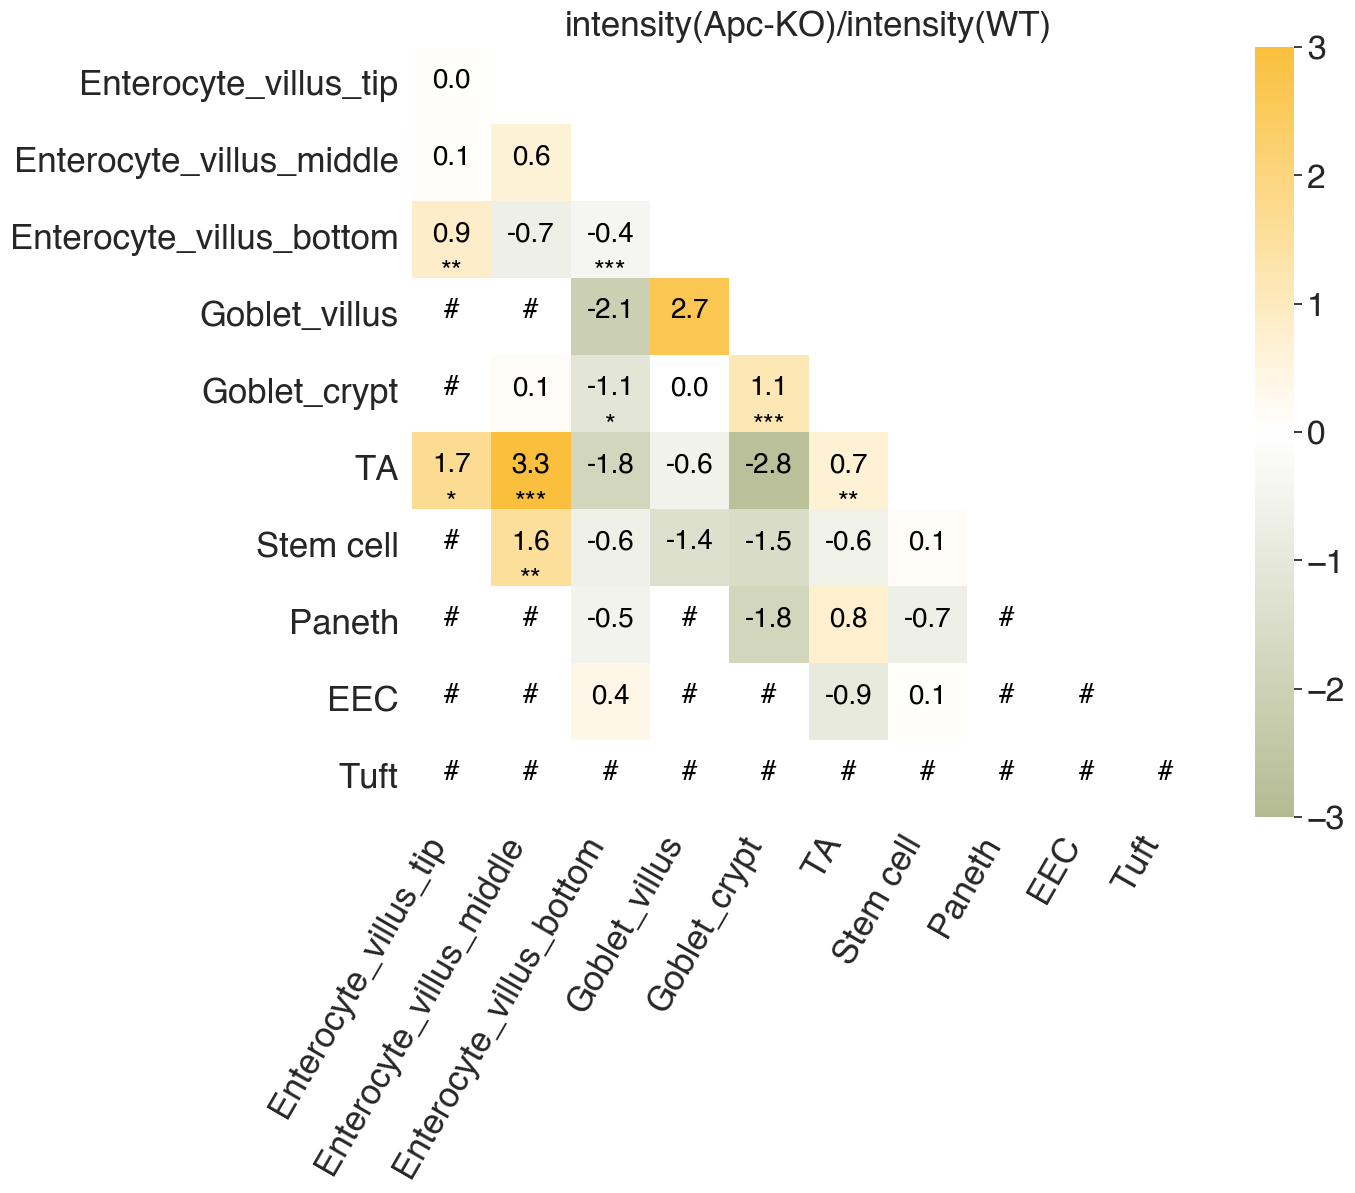

In [31]:
df_wt = df.loc[(df.condition=='WT')&(df.celltype_axis.isin(cts)),:]
clumps_all = df_wt.groupby('CellID')['celltype_axis'].apply(lambda x:list(x))
clumps = []
for clump in clumps_all:
    if len(clump) > 1:
        clumps.append(clump)

is_wt = InteractionStrength(clumps, cts, method='count', weight=False)

cmap2 = continue_color( "#ffffff",'#fac03d', n_colors=100, show=False)
cmap1 = continue_color('#697723', "#ffffff", n_colors=200, show=False)
cmap = cmap1[100:]+cmap2

heatmapPlot2(e, 
             ibool=is_wt,
             ibool_threashold=2,
             pvalue=p,
             vmax=3, 
             vmin=-3, 
             figsize=(12.8,10),
             fmt='.1f', 
             title='intensity(Apc-KO)/intensity(WT)',
             cmap=cmap,
             save=False)

## Notum & Ly6a

In [32]:
adata = sc.read_h5ad('/home/tiankang/tanglei/submit/processed/Fig.3-4/adata.h5ad')
df = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/result.txt', sep='\t', index_col=0)
df['celltype_yap'] = adata.obs['celltype_yap'].astype('category')
df = df.loc[df['qc']==1]

cts = ['Enterocyte_villus_tip',
       'Enterocyte_villus_middle', 
       'Enterocyte_villus_bottom', 
       'Goblet_villus',
       'Goblet_crypt',
       # 'TA',
       'TA_yap',
       'TA_Notum',
       'TA_norm',
       'Stem cell',
       'Paneth',
       'EEC',
       'Tuft']

In [33]:
df_ko = df.loc[(df.condition=='APC-ko')&(df.celltype_yap.isin(cts)),:]
clumps_all = df_ko.groupby('CellID')['celltype_yap'].apply(lambda x:list(x))
clumps = []
for clump in clumps_all:
    if len(clump) > 1:
        clumps.append(clump)

is1 = InteractionStrength(clumps, cts, method='intensity', weight=False)
is2 = InteractionStrength(clumps, cts, method='count', weight=False)

tmp = df_ko.loc[df_ko['CellID'].isin(df_ko['CellID'].value_counts()[df_ko['CellID'].value_counts()>1].index)]
cellcounts = tmp['celltype_yap'].value_counts()
obs_ko = is1.copy()
for i in obs_ko.index:
    for j in obs_ko.columns:
        obs_ko.loc[i,j] = 100*obs_ko.loc[i,j]/(cellcounts[i]*cellcounts[j])**0.5

<Figure size 10000x200 with 0 Axes>

<Figure size 1280x1000 with 0 Axes>

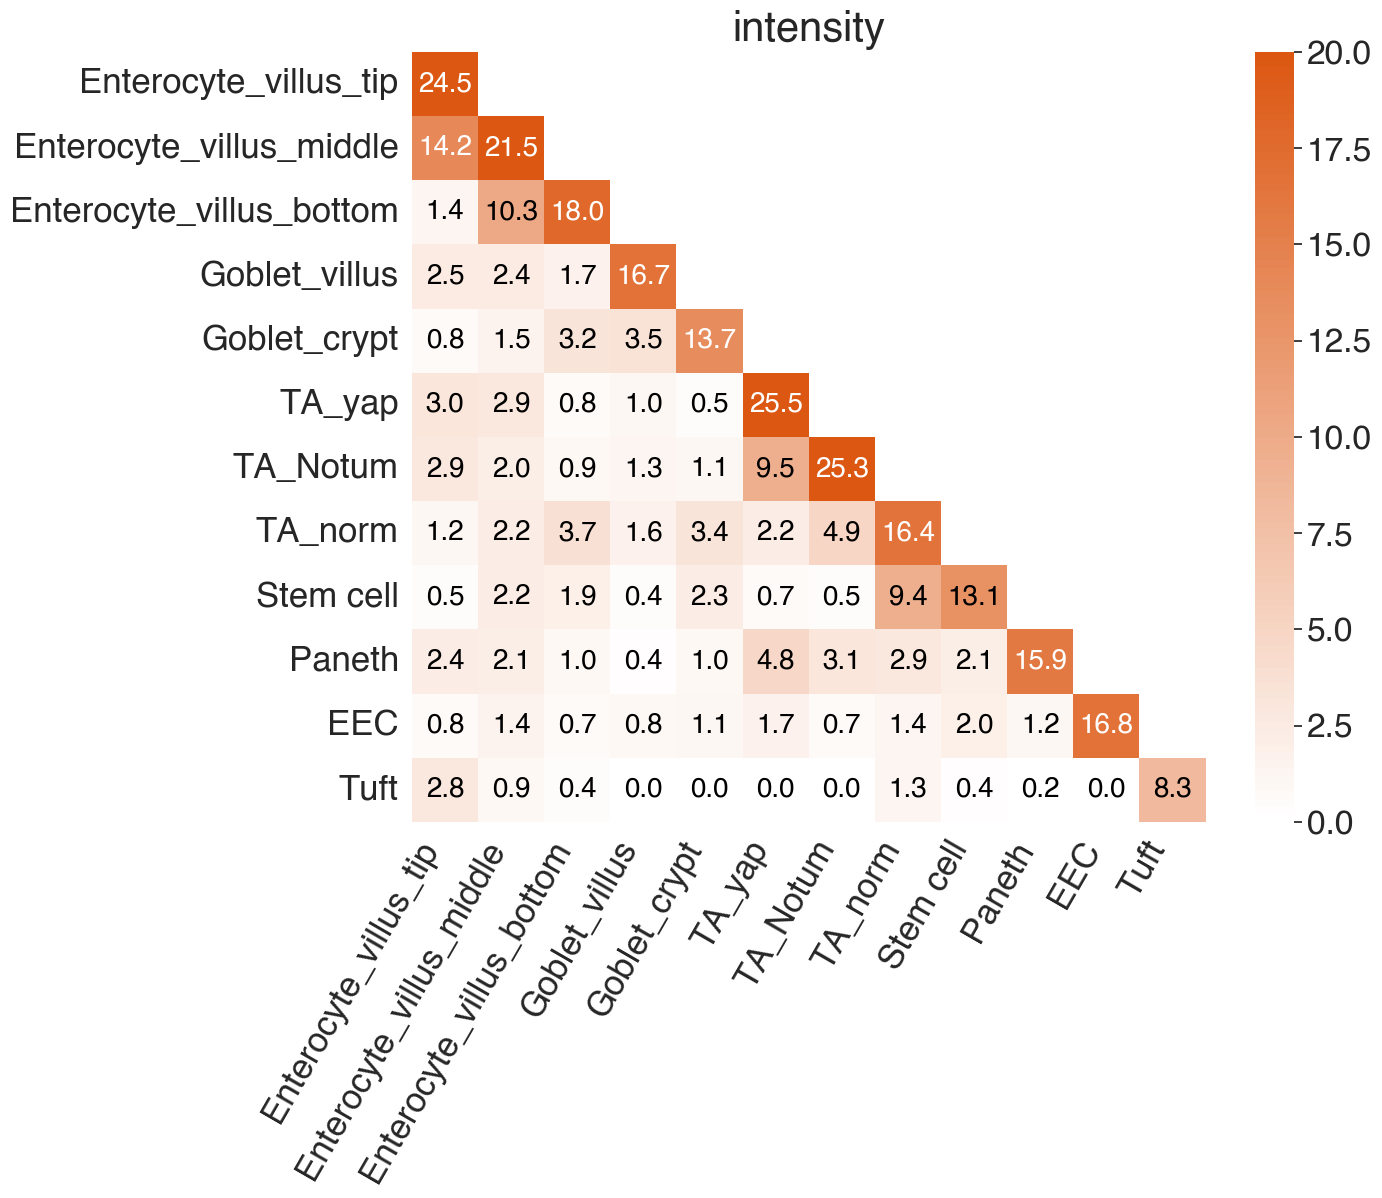

In [34]:
cmap = continue_color("#ffffff", "#dc5712", n_colors=100, show=False)
heatmapPlot(obs_ko, 
            figsize=(12.8,10),
            fmt='.1f', 
            minimum=0,
            # pvalue=obs, 
            threashold=20, 
            title='intensity',
            cmap=cmap)

<Figure size 10000x200 with 0 Axes>

<Figure size 1250x1000 with 0 Axes>

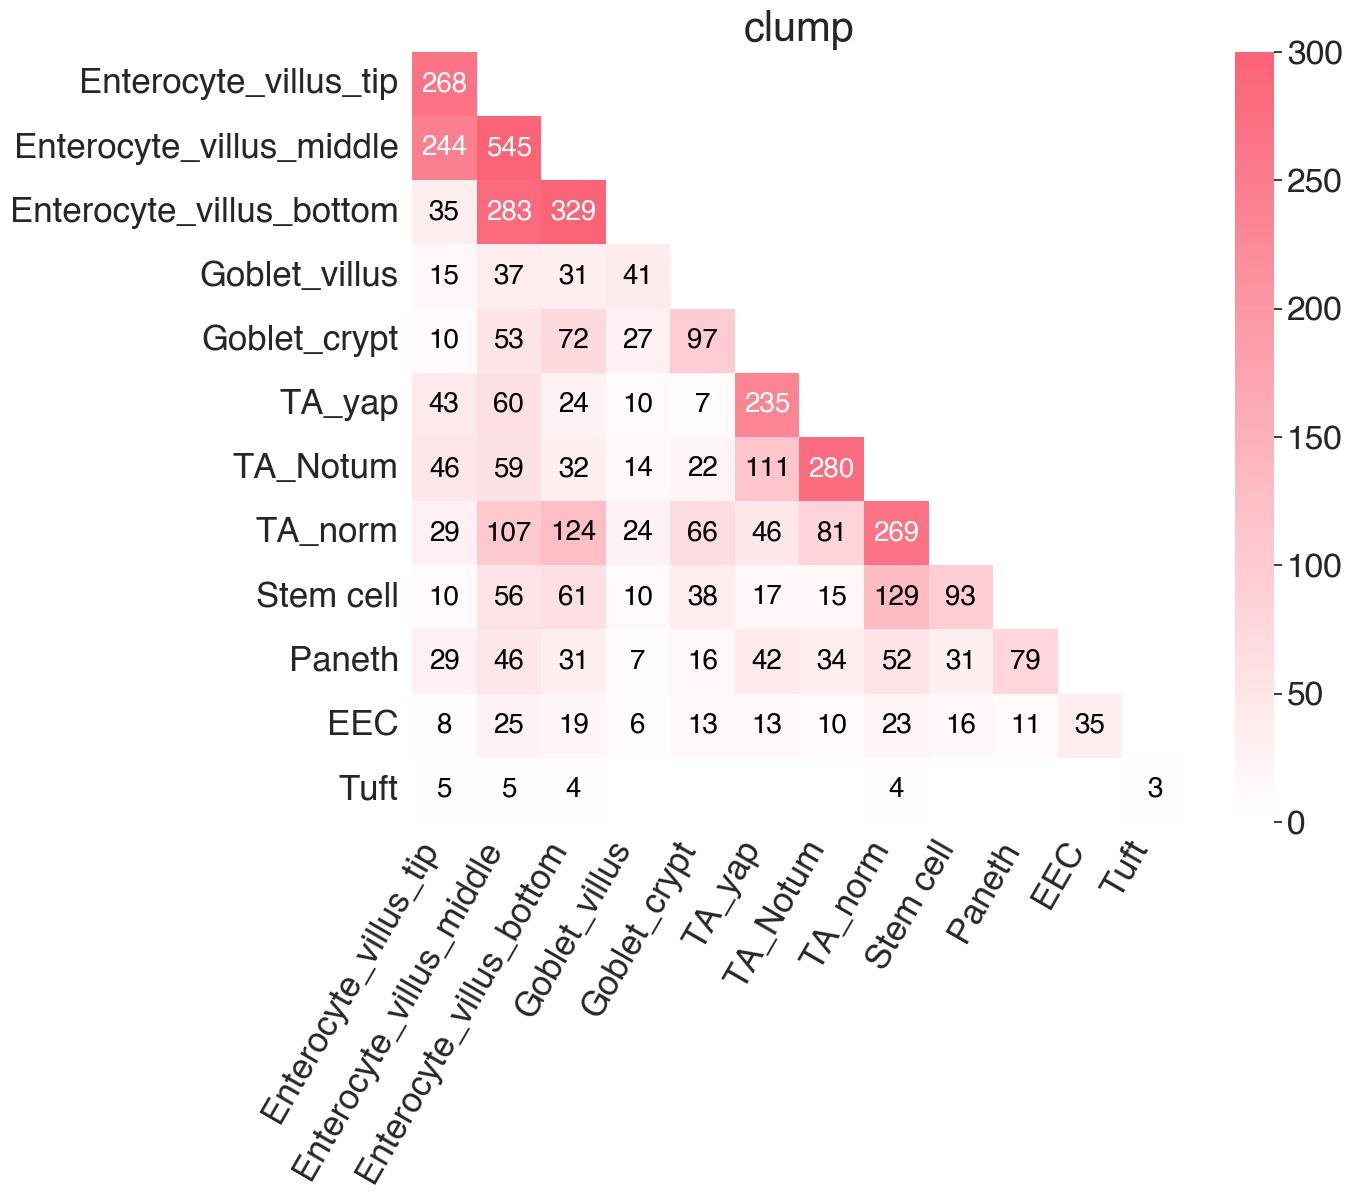

In [35]:
obs = is2.copy().astype(int)
cmap = continue_color("#ffffff", "#FB6376", n_colors=100, show=False)

heatmapPlot(obs, 
            figsize=(12.5,10),
            fmt='d', 
            minimum=3,
            pvalue=obs, 
            threashold=300, 
            title='clump',
            cmap=cmap)

In [ ]:
permutation_test(df_ko, key='celltype_yap', outdir='./interaction/Notum_Ly6a/')

In [40]:
e = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/interaction/Notum_Ly6a/e.txt', sep='\t', index_col=0)
e = np.log2(e)
e.replace([np.inf, -np.inf], 0, inplace=True)
p = pd.read_csv('/home/tiankang/tanglei/submit/processed/Fig.3-4/interaction/Notum_Ly6a/p.txt', sep='\t', index_col=0)

/home/tiankang/software/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


<Figure size 10000x200 with 0 Axes>

<Figure size 20000x200 with 0 Axes>

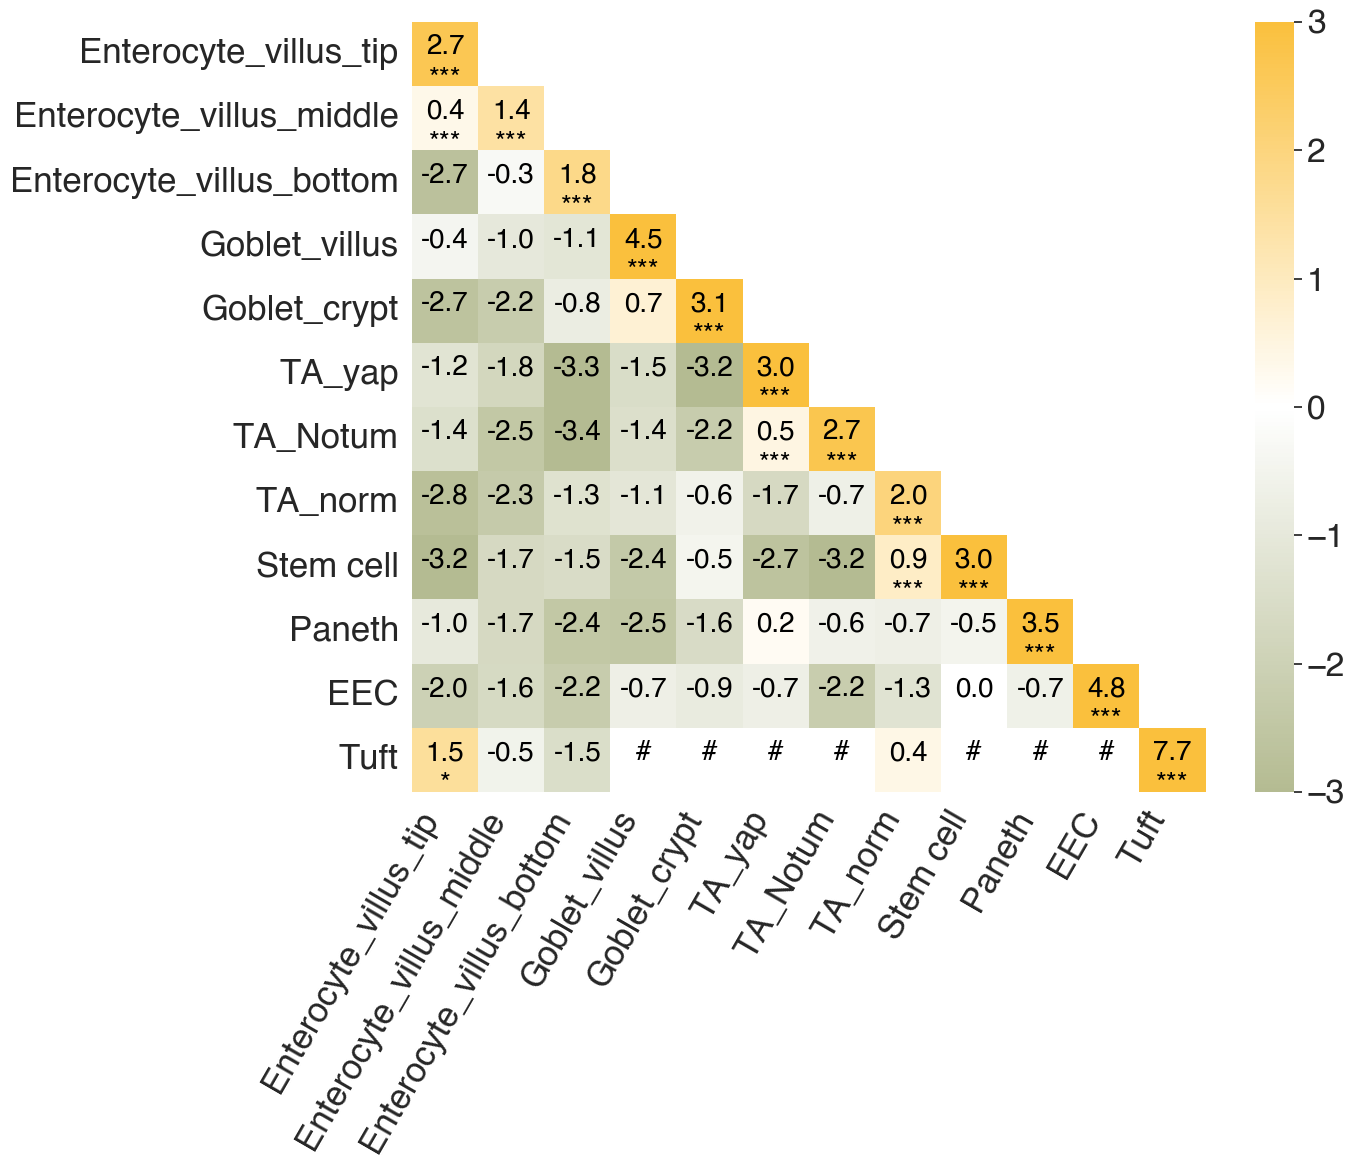

In [41]:
cmap2 = continue_color( "#ffffff",'#fac03d', n_colors=100, show=False)
cmap1 = continue_color('#697723', "#ffffff", n_colors=200, show=False)
cmap = cmap1[100:]+cmap2
heatmapPlot2(e,
            ibool=is2,
            ibool_threashold=2,
            pvalue=p,
            vmax=3,
            vmin=-3,
            cmap=cmap,
            fmt='.1f',
            figsize=(12.8,10),
            title='')